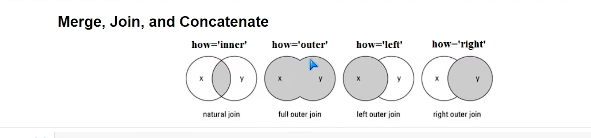

In [2]:
import pandas as pd


In [15]:
df1 = pd.read_csv('/home/yusuf/Masaüstü/coding/pandas-examples/pandas-tutorials/data/LOTR.csv')
df2 = pd.read_csv('/home/yusuf/Masaüstü/coding/pandas-examples/pandas-tutorials/data/LOTR2.csv')

In [5]:
df1

,FellowshipID,FirstName,Skills
0,1001,Frodo,Hiding
1,1002,Samwise,Gardening
2,1003,Gandalf,Spells
3,1004,Pippin,Fireworks


In [16]:
#df2.sort_index(ascending=False, inplace=True)
df2

,FellowshipID,FirstName,Age
0,1001,Frodo,50
1,1002,Samwise,39
2,1006,Legolas,2931
3,1007,Elrond,6520
4,1008,Barromir,51


In [ ]:
df1.merge(df2) #default olarak her ikisinde ortak olanları birleştirir. **inner join**
#df1.merge(df2, how='inner') ortak sutunları aynnı üzerinden işlem yapar

,FellowshipID,FirstName,Skills,Age
0,1001,Frodo,Hiding,50
1,1002,Samwise,Gardening,39


In [ ]:
df1.merge(df2, how='inner', on = ['FellowshipID','FirstName'])


,FellowshipID,FirstName,Skills,Age
0,1001,Frodo,Hiding,50
1,1002,Samwise,Gardening,39


In [ ]:
df1.merge(df2, how='inner', on = 'FellowshipID') #burada ikisindede aynı olan mevcut sütun isimlerini eşler aynı olmama durumu olup ılmadıgına bakılmazsa x ve y yazarak ayrışma sağlar


,FellowshipID,FirstName_x,Skills,FirstName_y,Age
0,1001,Frodo,Hiding,Frodo,50
1,1002,Samwise,Gardening,Samwise,39


In [21]:
df1.merge(df2, how='outer') #eslesmeyen fellowship aynı idlerine nan value koyarak aynı fellowship idyi kullanabilir

,FellowshipID,FirstName,Skills,Age
0,1001,Frodo,Hiding,50.0
1,1002,Samwise,Gardening,39.0
2,1003,Gandalf,Spells,NaN
3,1004,Pippin,Fireworks,NaN
4,1006,Legolas,NaN,2931.0
5,1007,Elrond,NaN,6520.0
6,1008,Barromir,NaN,51.0


In [22]:
df1.merge(df2, how='left')

,FellowshipID,FirstName,Skills,Age
0,1001,Frodo,Hiding,50.0
1,1002,Samwise,Gardening,39.0
2,1003,Gandalf,Spells,NaN
3,1004,Pippin,Fireworks,NaN


In [23]:
df1.merge(df2, how='right')

,FellowshipID,FirstName,Skills,Age
0,1001,Frodo,Hiding,50
1,1002,Samwise,Gardening,39
2,1006,Legolas,NaN,2931
3,1007,Elrond,NaN,6520
4,1008,Barromir,NaN,51


In [ ]:
df1.merge(df2, how='cross') #kartezyen carpımı

,FellowshipID_x,FirstName_x,Skills,FellowshipID_y,FirstName_y,Age
0,1001,Frodo,Hiding,1001,Frodo,50
1,1001,Frodo,Hiding,1002,Samwise,39
2,1001,Frodo,Hiding,1006,Legolas,2931
3,1001,Frodo,Hiding,1007,Elrond,6520
4,1001,Frodo,Hiding,1008,Barromir,51
5,1002,Samwise,Gardening,1001,Frodo,50
6,1002,Samwise,Gardening,1002,Samwise,39
7,1002,Samwise,Gardening,1006,Legolas,2931
8,1002,Samwise,Gardening,1007,Elrond,6520
9,1002,Samwise,Gardening,1008,Barromir,51


**join function**

Pandas kütüphanesinde veri çerçevelerini (DataFrame) birleştirmenin temel yollarından biri join() metodudur. Genellikle veri çerçevelerini indekslerine göre birleştirmek için kullanılır, ancak belirli durumlarda bir sütunu başka bir veri çerçevesinin indeksiyle birleştirmek için de yapılandırılabilir.

Temel olarak, df1.join(df2) şeklinde kullanıldığında, df1'in indeksi ile df2'nin indeksi üzerinde bir birleştirme işlemi gerçekleştirir. Sonuç veri çerçevesi, birleştirme tipine (varsayılan olarak 'left') göre hem df1 hem de df2'den sütunları içerecektir.

In [40]:
df1.join(df2, on='FellowshipID', how='outer', lsuffix='_left',rsuffix='_right')

,FellowshipID,FellowshipID_left,FirstName_left,Skills,FellowshipID_right,FirstName_right,Age
NaN,0,NaN,NaN,NaN,1001.0,Frodo,50.0
NaN,1,NaN,NaN,NaN,1002.0,Samwise,39.0
NaN,2,NaN,NaN,NaN,1006.0,Legolas,2931.0
NaN,3,NaN,NaN,NaN,1007.0,Elrond,6520.0
NaN,4,NaN,NaN,NaN,1008.0,Barromir,51.0
0.0,1001,1001.0,Frodo,Hiding,NaN,NaN,NaN
1.0,1002,1002.0,Samwise,Gardening,NaN,NaN,NaN
2.0,1003,1003.0,Gandalf,Spells,NaN,NaN,NaN
3.0,1004,1004.0,Pippin,Fireworks,NaN,NaN,NaN


In [31]:
df4 = df1.set_index('FellowshipID').join(df2.set_index('FellowshipID'),how='outer',lsuffix='_left',rsuffix='_right')
df4

,FirstName_left,Skills,FirstName_right,Age
FellowshipID,,,,
1001,Frodo,Hiding,Frodo,50.0
1002,Samwise,Gardening,Samwise,39.0
1003,Gandalf,Spells,NaN,NaN
1004,Pippin,Fireworks,NaN,NaN
1006,NaN,NaN,Legolas,2931.0
1007,NaN,NaN,Elrond,6520.0
1008,NaN,NaN,Barromir,51.0


**concatening**

Pandas'ta "concatenating" (birleştirme veya art arda ekleme), birden çok Pandas nesnesini (Series veya DataFrame gibi) tek bir nesne halinde birleştirmek anlamına gelir. Bu işlem genellikle veri çerçevelerini alt alta (satır bazında) veya yan yana (sütun bazında) istiflemek için kullanılır. Hem axis=0 hem axis=1 üzerinden birleştirme yapar.

In [36]:
pd.concat([df1,df2], join='inner',axis=1)

,FellowshipID,FirstName,Skills,FellowshipID,FirstName,Age
0,1001,Frodo,Hiding,1001,Frodo,50
1,1002,Samwise,Gardening,1002,Samwise,39
2,1003,Gandalf,Spells,1006,Legolas,2931
3,1004,Pippin,Fireworks,1007,Elrond,6520


In [38]:
merged_left = pd.merge(df1, df2, on="FellowshipID", how="left")
merged_left


,FellowshipID,FirstName_x,Skills,FirstName_y,Age
0,1001,Frodo,Hiding,Frodo,50.0
1,1002,Samwise,Gardening,Samwise,39.0
2,1003,Gandalf,Spells,NaN,NaN
3,1004,Pippin,Fireworks,NaN,NaN


In [39]:
df1.set_index('FellowshipID').join(df2.set_index('FellowshipID'), how='inner')


ValueError: columns overlap but no suffix specified: Index(['FirstName'], dtype='object')